In [18]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy.stats import norm, skew, poisson, gamma
# No importo drive, prefiero arrastrar los archivos a "/content" directamente

In [19]:
ds_crudo = pd.read_csv('dataset_flujo_vehicular.csv')
ds_crudo.tail()

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD
150975,48Q3FG00+,15OCT2021:16:00:00,4499,Interna,-34.53698,-58.470968
150976,48Q3FG00+,15OCT2021:17:00:00,4137,Interna,-34.53698,-58.470968
150977,48Q3FG00+,15OCT2021:18:00:00,3868,Interna,-34.53698,-58.470968
150978,48Q3FG00+,15OCT2021:19:00:00,3103,Interna,-34.53698,-58.470968
150979,48Q3FG00+,15OCT2021:20:00:00,3107,Interna,-34.53698,-58.470968


In [20]:
filas = np.shape(ds_crudo)[0]
columnas = np.shape(ds_crudo)[1]
print('Filas: {:,.0f}'.format(filas), f'\nColumnas: {columnas}' ) # Vemos el tamaño del dataset

Filas: 150,980 
Columnas: 6


In [21]:
ds_crudo.dtypes # Vemos el tipo de datos en el dataset

CODIGO_LOCACION     object
HORA                object
CANTIDAD             int64
SENTIDO             object
LATITUD            float64
LONGITUD           float64
dtype: object

In [22]:
ds_crudo.tail() # Finalmente vemos un ejemplo rápido

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD
150975,48Q3FG00+,15OCT2021:16:00:00,4499,Interna,-34.53698,-58.470968
150976,48Q3FG00+,15OCT2021:17:00:00,4137,Interna,-34.53698,-58.470968
150977,48Q3FG00+,15OCT2021:18:00:00,3868,Interna,-34.53698,-58.470968
150978,48Q3FG00+,15OCT2021:19:00:00,3103,Interna,-34.53698,-58.470968
150979,48Q3FG00+,15OCT2021:20:00:00,3107,Interna,-34.53698,-58.470968


In [23]:
ds_crudo['CODIGO_LOCACION'].unique() # para averigar cuántos sensores aportan datos al dataset

array(['48Q3CJ00+', '48Q39G00+', '48Q3CH00+', '48Q39J00+', '48Q3FG00+',
       '48Q39H00+', '27262200+', '2H2M2200+', '39H7JC00+'], dtype=object)

In [24]:
ds_aux = ds_crudo.copy(deep=True) #Creo una copia del ds crudo para poder hacerle modificaciones

In [25]:
# PARA COMPROBAR QUE LOS CODIGOS_LOCACION CORRESPONDEN A UN PUNTO GEOGRÁFICO ÚNICO

In [26]:
ds_crudo['LATITUD'].unique() # debería haber la misma cantidad de puntos que CODIGOS_LOCACION

array([-34.588796, -34.633299, -34.579632, -34.60855 , -34.53698 ,
       -34.618036,        nan])

In [27]:
ds_crudo['LONGITUD'].unique() # Viendo que solo hay 6 y no 9, revisamos también LONGITUD

array([-58.38152 , -58.468594, -58.427733, -58.372951, -58.470968,
       -58.410236,        nan, -58.468594, -58.427733, -58.38152 ])

In [28]:
# Averiguamos la cantidad de puntos (combinación de LAT y LON) sin NaNs

In [29]:
ds_aux["LATITUD"] = round(ds_aux["LATITUD"], 6)
ds_aux["LONGITUD"] = round(ds_aux["LONGITUD"], 6) # 1ero expresamos todas las coordenadas con la misma cantidad de decimales para evitar repeticiones

In [30]:
cant_NaN = ds_aux.isnull().sum()
print(cant_NaN,'\r\n')

CODIGO_LOCACION      0
HORA                 0
CANTIDAD             0
SENTIDO              0
LATITUD            994
LONGITUD           994
dtype: int64 



In [31]:
#Consideramos que la cantidad de NaN son irrelevantes con respecto a la totalidad del ds, así que los eliminamos:

In [32]:
ds_aux.dropna(subset=["LATITUD"],inplace=True)
ds_aux.dropna(subset=["LONGITUD"],inplace=True)

In [33]:
ds_aux["Coordenadas"] = ds_aux["LATITUD"].astype(str) + ', ' + ds_aux["LONGITUD"].astype(str) #Creo una nueva columna que exprese un punto en el mapa

In [34]:
ds_aux['Coordenadas'].unique() # Finalmente vemos cuantos puntos únicos (sensores) hay en el dataset

array(['-34.588796, -58.38152', '-34.633299, -58.468594',
       '-34.579632, -58.427733', '-34.60855, -58.372951',
       '-34.53698, -58.470968', '-34.618036, -58.410236'], dtype=object)

In [35]:
print(f'Se quitaron {filas-np.shape(ds_aux)[0]} filas')
print("Quedan: ",np.shape(ds_aux)[0]) # Para ver cuántas filas quitamos del ds

Se quitaron 994 filas
Quedan:  149986


In [36]:
# Al tener solo 6 puntos únicos, se ingresan manualmente en google maps, y se chequean también los códigos de locación
# Se verifica que efectivamente son solo 6 los que pertenecen a CABA:
puntos = ['Retiro','Flores','Palermo','Plaza de Mayo', 'Cabildo y Gral. Paz', 'Hospital Ramos Mejia']

In [37]:
ds_aux['SENTIDO'].unique() # Vemos posibles sentidos

array(['Interna', 'Egreso', 'Ingreso'], dtype=object)

In [38]:
# La columna SENTIDO, que es categórica, queremos abrirla en dummies

In [39]:
dummies = pd.get_dummies(ds_aux['SENTIDO'])
ds_aux = pd.concat([ds_aux,dummies],axis = 1) # Generamos los dummies y los agregamos al ds
ds_aux.head() # Chequeo visual

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,Coordenadas,Egreso,Ingreso,Interna
0,48Q3CJ00+,31MAR2020:15:00:00,729,Interna,-34.588796,-58.381520,"-34.588796, -58.38152",0,0,1
1,48Q3CJ00+,31MAR2020:15:00:00,447,Egreso,-34.588796,-58.381520,"-34.588796, -58.38152",1,0,0
2,48Q39G00+,31MAR2020:15:00:00,175,Interna,-34.633299,-58.468594,"-34.633299, -58.468594",0,0,1
3,48Q39G00+,31MAR2020:15:00:00,1186,Egreso,-34.633299,-58.468594,"-34.633299, -58.468594",1,0,0
4,48Q3CH00+,31MAR2020:15:00:00,35,Egreso,-34.579632,-58.427733,"-34.579632, -58.427733",1,0,0


In [40]:
# Ahora encaramos la tranformación del campo HORA en 2 separados, uno para la hora, y otro para la fecha

In [41]:
ds_aux['HORA'] = ds_aux['HORA'].apply(lambda x: datetime.strptime(x[:12], '%d%b%Y:%H')) # Primero le damos un formato más manejable

In [42]:
ds_aux['HORA'] = ds_aux['HORA'].astype('str') # Paso HORA a texto para poder separar facilmente
ds_aux['Fecha'] = ds_aux.HORA.str.slice(0,10)
ds_aux['Hora'] = ds_aux.HORA.str.slice(11,13) # Creamos 2 columnas nuevas con fecha y hora basandonos en la anterior HORA

In [43]:
ds_aux['Fecha'] = ds_aux['Fecha'].apply(lambda x: datetime.strptime(x[:10],'%Y-%m-%d')) #Paso Fecha a un formato más manejable también
ds_aux.head() # otro chequeo visual

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,Coordenadas,Egreso,Ingreso,Interna,Fecha,Hora
0,48Q3CJ00+,2020-03-31 15:00:00,729,Interna,-34.588796,-58.381520,"-34.588796, -58.38152",0,0,1,2020-03-31,15
1,48Q3CJ00+,2020-03-31 15:00:00,447,Egreso,-34.588796,-58.381520,"-34.588796, -58.38152",1,0,0,2020-03-31,15
2,48Q39G00+,2020-03-31 15:00:00,175,Interna,-34.633299,-58.468594,"-34.633299, -58.468594",0,0,1,2020-03-31,15
3,48Q39G00+,2020-03-31 15:00:00,1186,Egreso,-34.633299,-58.468594,"-34.633299, -58.468594",1,0,0,2020-03-31,15
4,48Q3CH00+,2020-03-31 15:00:00,35,Egreso,-34.579632,-58.427733,"-34.579632, -58.427733",1,0,0,2020-03-31,15


In [44]:
# Las coordenadas como puntos son poco legibles, por lo que reemplazo por el punto que ubicamos anteriormente en el mapa

In [45]:
coord = ds_aux['Coordenadas'].unique() # Creo lista con los puntos coordenados

In [46]:
ds_aux.replace(coord, puntos, inplace=True) # Reemplazo los puntos por sus nombres reales que definí anteriormente
ds_aux.head() # Chequeo visual

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,Coordenadas,Egreso,Ingreso,Interna,Fecha,Hora
0,48Q3CJ00+,2020-03-31 15:00:00,729,Interna,-34.588796,-58.381520,Retiro,0,0,1,2020-03-31,15
1,48Q3CJ00+,2020-03-31 15:00:00,447,Egreso,-34.588796,-58.381520,Retiro,1,0,0,2020-03-31,15
2,48Q39G00+,2020-03-31 15:00:00,175,Interna,-34.633299,-58.468594,Flores,0,0,1,2020-03-31,15
3,48Q39G00+,2020-03-31 15:00:00,1186,Egreso,-34.633299,-58.468594,Flores,1,0,0,2020-03-31,15
4,48Q3CH00+,2020-03-31 15:00:00,35,Egreso,-34.579632,-58.427733,Palermo,1,0,0,2020-03-31,15


In [47]:
# Decidimos no usar los valores de circulación con sentido interno, nos vamos a concentrar en los que salen y entran de la ciudad

In [48]:
ds_small = ds_aux.copy(deep=True) #Creamos una copia del ds_aux para no perder valor en caso de necesitarlos más adelante

In [50]:
ds_small = ds_small[ds_small.Interna != 1] #para eliminar el sentido de circulación interno
ds_small

,CODIGO_LOCACION,HORA,CANTIDAD,SENTIDO,LATITUD,LONGITUD,Coordenadas,Egreso,Ingreso,Interna,Fecha,Hora
1,48Q3CJ00+,2020-03-31 15:00:00,447,Egreso,-34.588796,-58.381520,Retiro,1,0,0,2020-03-31,15
3,48Q39G00+,2020-03-31 15:00:00,1186,Egreso,-34.633299,-58.468594,Flores,1,0,0,2020-03-31,15
4,48Q3CH00+,2020-03-31 15:00:00,35,Egreso,-34.579632,-58.427733,Palermo,1,0,0,2020-03-31,15
7,48Q39G00+,2020-03-31 15:00:00,1235,Ingreso,-34.633299,-58.468594,Flores,0,1,0,2020-03-31,15
8,48Q39G00+,2020-03-31 14:00:00,1535,Egreso,-34.633299,-58.468594,Flores,1,0,0,2020-03-31,14
...,...,...,...,...,...,...,...,...,...,...,...,...
150948,48Q3CJ00+,2021-10-15 18:00:00,3401,Ingreso,-34.588796,-58.381520,Retiro,0,1,0,2021-10-15,18
150950,48Q3CJ00+,2021-10-15 19:00:00,2493,Egreso,-34.588796,-58.381520,Retiro,1,0,0,2021-10-15,19
150951,48Q3CJ00+,2021-10-15 19:00:00,3268,Ingreso,-34.588796,-58.381520,Retiro,0,1,0,2021-10-15,19
150953,48Q3CJ00+,2021-10-15 20:00:00,2414,Egreso,-34.588796,-58.381520,Retiro,1,0,0,2021-10-15,20


In [51]:
ds_small.drop(columns=['CODIGO_LOCACION','LATITUD','LONGITUD','Interna'], inplace=True) # Eliminamos el resto de los campos que no usamos

In [52]:
ds_small.head() # Chequeo visual

,HORA,CANTIDAD,SENTIDO,Coordenadas,Egreso,Ingreso,Fecha,Hora
1,2020-03-31 15:00:00,447,Egreso,Retiro,1,0,2020-03-31,15
3,2020-03-31 15:00:00,1186,Egreso,Flores,1,0,2020-03-31,15
4,2020-03-31 15:00:00,35,Egreso,Palermo,1,0,2020-03-31,15
7,2020-03-31 15:00:00,1235,Ingreso,Flores,0,1,2020-03-31,15
8,2020-03-31 14:00:00,1535,Egreso,Flores,1,0,2020-03-31,14


In [53]:
ds_small['Coordenadas'].unique() # Vemos los sensores que aportan info de entrada y salida

array(['Retiro', 'Flores', 'Palermo'], dtype=object)

In [54]:
# Importamos un dataset calendario:
ds_calendario = pd.read_excel('calendario.xlsx')
ds_calendario.head() # Cargo el nuevo dataset y chequeo la info que trae ( de antemano me aseguré que tenga datos para el rango de tiempo completo de nuestro ds principal)

,Fecha,Dia_Semana,Dia_Mes,Dia_Anio,Dia_Sema_Mes,Semana_Mes,Semana_Anio,Mes,Trimestre,Anio,Fecha_Habil_Posterior,Fecha_Habil_Anterior,Fecha_Saldo,Fecha_Habil
0,2020-03-31,3,31,91,5,5,13,3,1,2020,2020-04-01,2020-03-30,2020-03-30,0
1,2020-04-01,4,1,92,1,0,13,4,2,2020,2020-04-02,2020-03-30,2020-04-01,1
2,2020-04-02,5,2,93,1,0,13,4,2,2020,2020-04-03,2020-04-01,2020-04-02,1
3,2020-04-03,6,3,94,1,0,13,4,2,2020,2020-04-06,2020-04-02,2020-04-03,1
4,2020-04-04,7,4,95,1,0,13,4,2,2020,2020-04-06,2020-04-03,2020-04-03,0


In [55]:
# Solo neceitamos los campos fecha para poder juntar los ds, dia_semana, y fecha_habil

In [56]:
ds_calendario.drop(columns=['Dia_Mes','Dia_Anio','Dia_Sema_Mes','Semana_Mes','Semana_Anio','Mes','Trimestre','Anio','Fecha_Habil_Posterior','Fecha_Habil_Anterior','Fecha_Saldo'], inplace=True)
ds_calendario.columns=['Fecha','dia_semana','fecha_habil']

In [57]:
ds_rich = pd.merge(ds_small, ds_calendario, on='Fecha', how='left') # Creamos un nuevo dataset enriquecido haciendo el joinleft de small y calendario
ds_rich.head() # Chequeo visual

,HORA,CANTIDAD,SENTIDO,Coordenadas,Egreso,Ingreso,Fecha,Hora,dia_semana,fecha_habil
0,2020-03-31 15:00:00,447,Egreso,Retiro,1,0,2020-03-31,15,3.0,0.0
1,2020-03-31 15:00:00,1186,Egreso,Flores,1,0,2020-03-31,15,3.0,0.0
2,2020-03-31 15:00:00,35,Egreso,Palermo,1,0,2020-03-31,15,3.0,0.0
3,2020-03-31 15:00:00,1235,Ingreso,Flores,0,1,2020-03-31,15,3.0,0.0
4,2020-03-31 14:00:00,1535,Egreso,Flores,1,0,2020-03-31,14,3.0,0.0


In [58]:
filas_rich = np.shape(ds_rich)[0]
columnas_rich = np.shape(ds_rich)[1]
print('Filas: {:,.0f}'.format(filas_rich), f'\nColumnas: {columnas_rich}' ) # Vemos el tamaño del nuevo dataset

Filas: 70,739 
Columnas: 10


In [59]:
ds_rich.dtypes # Vemos en el chequeo visual que algunos datos no estan formateados de la mejor forma

HORA                   object
CANTIDAD                int64
SENTIDO                object
Coordenadas            object
Egreso                  uint8
Ingreso                 uint8
Fecha          datetime64[ns]
Hora                   object
dia_semana            float64
fecha_habil           float64
dtype: object

In [60]:
# Al querer pasar los días de semana a 'int' nos avisa que hay valores NaN, por lo que los dropeamos
ds_rich.dropna(subset=["dia_semana"],inplace=True)
ds_rich.dropna(subset=["fecha_habil"],inplace=True)

In [61]:
ds_rich['Cantidad'] = ds_rich['CANTIDAD'].astype('int')
ds_rich.drop(columns=['CANTIDAD'],inplace=True) # Columna duplicada por cambio de nombre, la eliminamos
ds_rich['dia_semana'] = ds_rich['dia_semana'].astype('int')
ds_rich['fecha_habil'] = ds_rich['fecha_habil'].astype('int')
# Pasamos los campos a "integer"
ds_rich.head() # Chequeo Visual

,HORA,SENTIDO,Coordenadas,Egreso,Ingreso,Fecha,Hora,dia_semana,fecha_habil,Cantidad
0,2020-03-31 15:00:00,Egreso,Retiro,1,0,2020-03-31,15,3,0,447
1,2020-03-31 15:00:00,Egreso,Flores,1,0,2020-03-31,15,3,0,1186
2,2020-03-31 15:00:00,Egreso,Palermo,1,0,2020-03-31,15,3,0,35
3,2020-03-31 15:00:00,Ingreso,Flores,0,1,2020-03-31,15,3,0,1235
4,2020-03-31 14:00:00,Egreso,Flores,1,0,2020-03-31,14,3,0,1535


In [62]:
dias_semana = ['domingo','lunes','martes','miercoles','jueves','viernes','sabado']
dias = [1, 2, 3, 4, 5, 6, 7] # Creamos 2 listas con los días para hacer el reemplazo en el ds y facilitar la lectura de los datos
ds_rich.sort_values(by=['dia_semana'], inplace=True) # Ordenamos el ds para que sea de domingo a sabado
ds_rich['dia_semana'].replace(dias, dias_semana, inplace=True)

In [63]:
ds_rich.head() # Chequeo visual

,HORA,SENTIDO,Coordenadas,Egreso,Ingreso,Fecha,Hora,dia_semana,fecha_habil,Cantidad
56500,2021-06-13 08:00:00,Ingreso,Retiro,0,1,2021-06-13,08,domingo,0,361
68119,2021-08-29 11:00:00,Egreso,Retiro,1,0,2021-08-29,11,domingo,0,2489
68118,2021-08-29 10:00:00,Ingreso,Retiro,0,1,2021-08-29,10,domingo,0,997
68117,2021-08-29 10:00:00,Egreso,Retiro,1,0,2021-08-29,10,domingo,0,1717
68116,2021-08-29 09:00:00,Ingreso,Retiro,0,1,2021-08-29,09,domingo,0,741


In [64]:
dummies = pd.get_dummies(ds_rich['dia_semana'])
ds_rich = pd.concat([ds_rich,dummies],axis = 1)

In [65]:
ds_final = ds_rich.copy(deep=True)

In [66]:
ds_rich.rename(columns={'Coordenadas': 'Sensor','dia_semana':'Dia', 'fecha_habil':'Habil'}, inplace=True) # Estandarizamos el nombre de los campos

In [67]:
ds_rich.reset_index(drop=True, inplace=True) # Reiniciamos índice por las dudas

In [68]:
filas_rich = np.shape(ds_rich)[0]
columnas_rich = np.shape(ds_rich)[1]
print('Filas: {:,.0f}'.format(filas_rich), f'\nColumnas: {columnas_rich}' ) # Dimensión actual del dataset

Filas: 67,259 
Columnas: 17


In [69]:
ds_rich.head()

,HORA,SENTIDO,Sensor,Egreso,Ingreso,Fecha,Hora,Dia,Habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,viernes
0,2021-06-13 08:00:00,Ingreso,Retiro,0,1,2021-06-13,08,domingo,0,361,1,0,0,0,0,0,0
1,2021-08-29 11:00:00,Egreso,Retiro,1,0,2021-08-29,11,domingo,0,2489,1,0,0,0,0,0,0
2,2021-08-29 10:00:00,Ingreso,Retiro,0,1,2021-08-29,10,domingo,0,997,1,0,0,0,0,0,0
3,2021-08-29 10:00:00,Egreso,Retiro,1,0,2021-08-29,10,domingo,0,1717,1,0,0,0,0,0,0
4,2021-08-29 09:00:00,Ingreso,Retiro,0,1,2021-08-29,09,domingo,0,741,1,0,0,0,0,0,0


In [70]:
# Hacemos algunas visualizaciones para entender mejor los datos

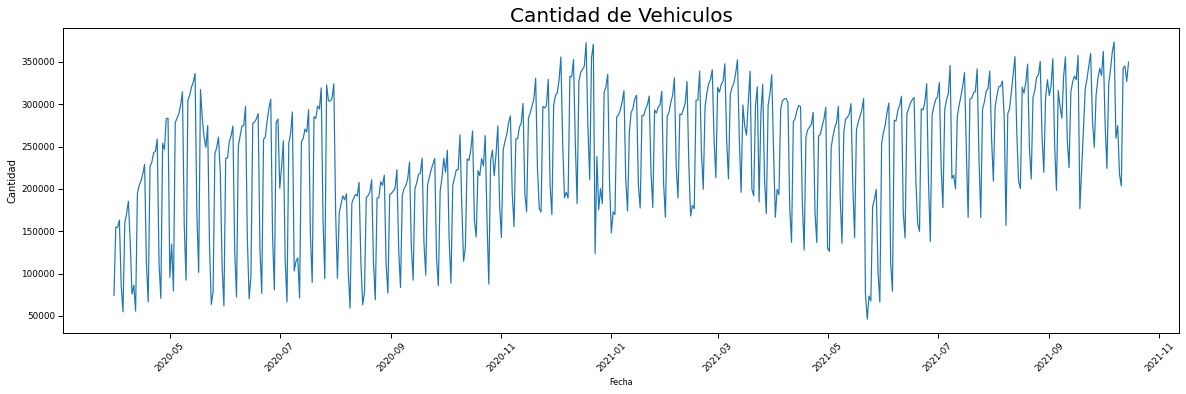

In [71]:
plt.figure(figsize=(20, 7))
sns.set_context("paper")
sns.lineplot(data=ds_rich, y='Cantidad', x='Fecha', ci=None, estimator=sum)
plt.xlabel("Fecha", size=8)
plt.xticks(rotation=45)
plt.ylabel("Cantidad", size=10)
plt.title('Cantidad de Vehiculos', size=20)
plt.subplots_adjust(bottom=0.275)
plt.show()

In [72]:
# Para evitar el ruido, creamos un ds para los días habiles solamente
ds_habiles = ds_rich.copy(deep=True)

In [73]:
ds_habiles.drop(ds_habiles[ds_habiles.Habil == 0].index, inplace=True) # Eliminamos los findes y feriados

In [74]:
ds_habiles.head() # ChV

,HORA,SENTIDO,Sensor,Egreso,Ingreso,Fecha,Hora,Dia,Habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,viernes
9467,2020-10-26 20:00:00,Ingreso,Flores,0,1,2020-10-26,20,lunes,1,2121,0,0,1,0,0,0,0
9468,2020-12-21 13:00:00,Ingreso,Flores,0,1,2020-12-21,13,lunes,1,8228,0,0,1,0,0,0,0
9469,2020-10-26 16:00:00,Egreso,Flores,1,0,2020-10-26,16,lunes,1,6367,0,0,1,0,0,0,0
9470,2020-10-26 21:00:00,Ingreso,Flores,0,1,2020-10-26,21,lunes,1,1495,0,0,1,0,0,0,0
9471,2020-12-21 04:00:00,Ingreso,Flores,0,1,2020-12-21,04,lunes,1,1112,0,0,1,0,0,0,0


In [75]:
ds_habiles = ds_habiles.groupby(['Fecha'], as_index=False).sum() # Agrupamos y sumamos para obtener la cantidad total por fecha

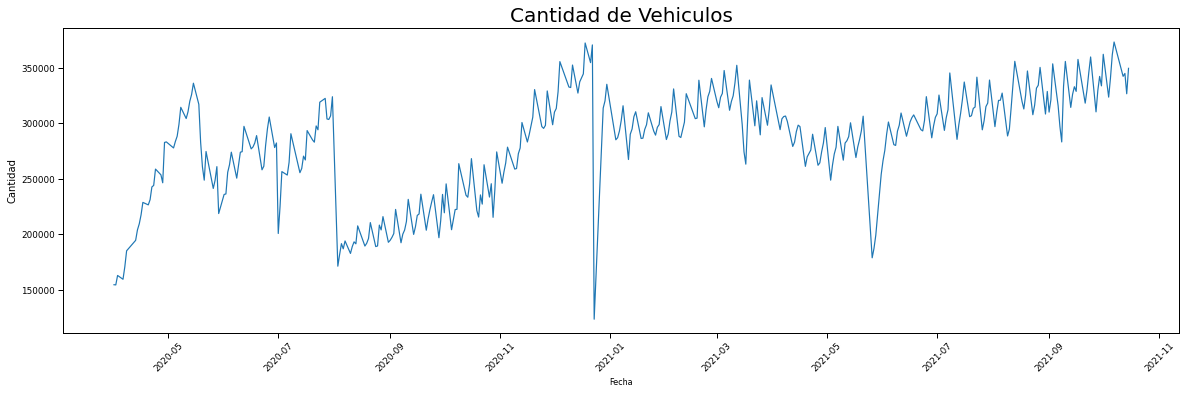

In [76]:
plt.figure(figsize=(20, 7))
sns.set_context("paper")
sns.lineplot(data=ds_habiles, y='Cantidad', x='Fecha')
plt.xlabel("Fecha", size=8)
plt.xticks(rotation=45)
plt.ylabel("Cantidad", size=10)
plt.title('Cantidad de Vehiculos', size=20)
plt.subplots_adjust(bottom=0.275)
plt.show()

In [77]:
max_tot = ds_habiles['Cantidad'].max()
min_tot = ds_habiles['Cantidad'].min()
print(ds_habiles[ds_habiles['Cantidad']==max_tot]['Fecha'] )
print(ds_habiles[ds_habiles['Cantidad']==min_tot]['Fecha'] ) # Comprobaciones para asegurarnos que estamos graficando la info correcta

368   2021-10-07
Name: Fecha, dtype: datetime64[ns]
177   2020-12-23
Name: Fecha, dtype: datetime64[ns]


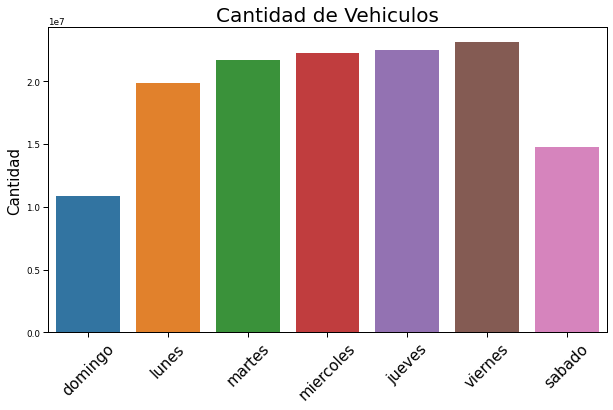

In [79]:
plt.figure(figsize=(10, 7))
sns.set_context("paper")
sns.barplot(data=ds_rich, y='Cantidad', x='Dia', ci=None, estimator=sum)
plt.xlabel("", size=1)
plt.xticks(rotation=45, size=15)
plt.ylabel("Cantidad", size=15)
plt.title('Cantidad de Vehiculos', size=20)
plt.subplots_adjust(bottom=0.275)
plt.show() # Graficamos todos los vehiculos por día

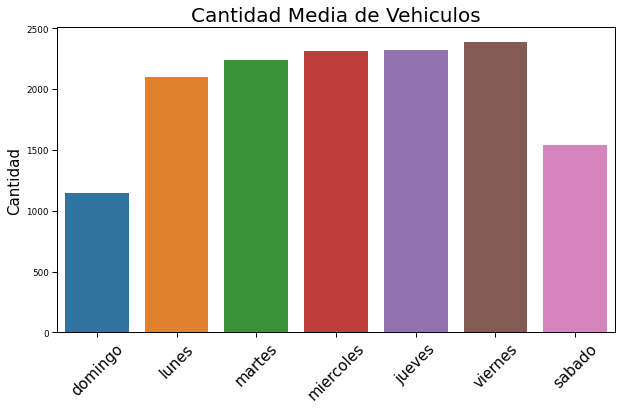

In [80]:
plt.figure(figsize=(10, 7))
sns.set_context("paper")
sns.barplot(data=ds_rich, y='Cantidad', x='Dia', ci=None)
plt.xlabel("", size=1)
plt.xticks(rotation=45, size=15)
plt.ylabel("Cantidad", size=15)
plt.title('Cantidad Media de Vehiculos', size=20)
plt.subplots_adjust(bottom=0.275)
plt.show()

In [81]:
ds_rich[ds_rich['Dia']=='viernes']['Cantidad'].mean()
ds_rich[ds_rich['Dia']=='domingo']['Cantidad'].mean() # Chequeo los valores

1148.1867539875357

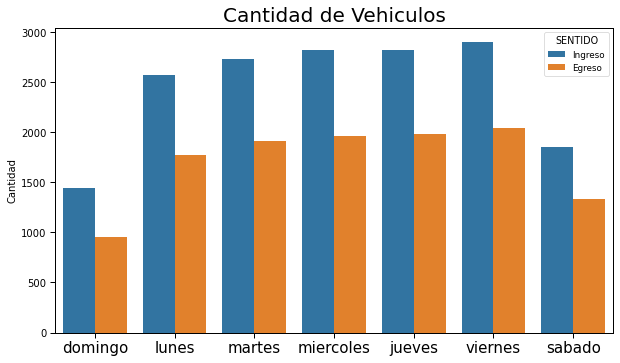

In [82]:
# Ahora vemos esta info, pero separando entrada y salida
plt.figure(figsize=(10, 7))
sns.set_context("paper")
sns.barplot(data=ds_rich, y='Cantidad', x='Dia', ci=None, hue='SENTIDO') # hue separa por variable categorica, x eso tuve que mantener el campo SENTIDO
plt.ylabel("Cantidad", size=10)
plt.xlabel("", size=1)
plt.yticks(size=10)
plt.xticks(size=15)
plt.title('Cantidad de Vehiculos', size=20)
plt.subplots_adjust(bottom=0.275)
plt.savefig('cantidad_vehiculos.png', dpi=300, bbox_inches='tight') #para exportar la imagen
plt.show()


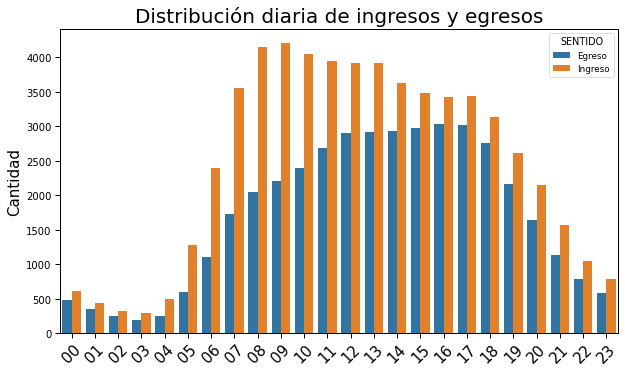

In [83]:
ds_rich.sort_values(by=['Hora'], inplace=True) # Ordeno para que el grafico salga con horario creciente
plt.figure(figsize=(10, 7))
sns.set_context("paper")
sns.barplot(data=ds_rich, y='Cantidad', x='Hora', ci=None, hue='SENTIDO')
plt.xlabel("", size=1)
plt.xticks(rotation=45, size=15)
plt.yticks(size=10)
plt.ylabel("Cantidad", size=15)
plt.title('Distribución diaria de ingresos y egresos', size=20)
plt.subplots_adjust(bottom=0.275)
plt.savefig('distribucion_diaria.png', dpi=300, bbox_inches='tight') #para exportar la imagen
plt.show()

In [84]:
# Este gráfico tiene sentido, si entendemos que la dinámica ingreso/egreso no es "suma 0"
# Para esto, deberíamos tener muchos más sensores distribuidos de forma homogenea

In [85]:
y =  ds_rich.Cantidad

C:\Users\sofip\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


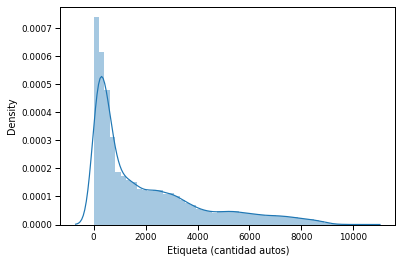

In [86]:
sns.distplot(y)
plt.xlabel('Etiqueta (cantidad autos)')
plt.show() # Vemos como se distribuyen las cantidades

In [87]:
cantidad_97 = ds_rich.Cantidad.quantile(0.97)
ds_rich = ds_rich.loc[(ds_rich.Cantidad < cantidad_97)]

In [88]:
ds_rich.Cantidad.max()

7455

C:\Users\sofip\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


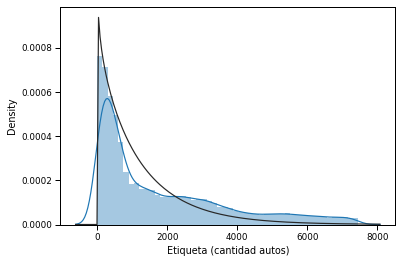

In [89]:
sns.distplot(ds_rich.Cantidad, fit=gamma)
plt.xlabel('Etiqueta (cantidad autos)')
plt.show() # Vemos como se distribuyen las cantidades

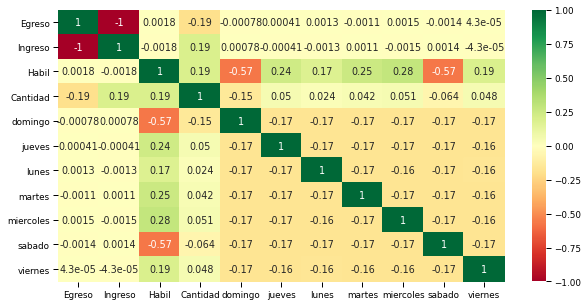

In [90]:
corrmat = ds_rich.corr()
plt.figure(figsize=(10,5))
g = sns.heatmap(ds_rich.corr(),annot=True,cmap="RdYlGn") #Vemos las correlaciones de nuestras features

In [91]:
ds_habiles.head()

,Fecha,Egreso,Ingreso,Habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,viernes
0,2020-04-01,72,48,120,154744,0,0,0,0,120,0,0
1,2020-04-02,72,48,120,154575,0,120,0,0,0,0,0
2,2020-04-03,72,48,120,163083,0,0,0,0,0,0,120
3,2020-04-06,72,48,120,159651,0,0,120,0,0,0,0
4,2020-04-07,72,48,120,170870,0,0,0,120,0,0,0


In [92]:
ds_habiles['Cantidad_ma5'] = ds_habiles.rolling(on='Fecha', window=5, center=True)['Cantidad'].mean() # Hago una columna de media movil para intentar ver efectos de estacionalidad semanal, bi semanal, mensual
ds_habiles['Cantidad_ma10'] = ds_habiles.rolling(on='Fecha', window=10, center=True)['Cantidad'].mean()
ds_habiles['Cantidad_ma20'] = ds_habiles.rolling(on='Fecha', window=20, center=True)['Cantidad'].mean()


In [ ]:
ds_habiles.dropna(subset=["Cantidad_ma20"],inplace=True) # Para quietar los valores que no tienen media movil
ds_habiles['suave'] = (ds_habiles['Cantidad_ma5'] + ds_habiles['Cantidad_ma10'] + ds_habiles['Cantidad_ma20'])/3 # simple curva "promedio" de las ma anteriores para suavizar
ds_habiles.head(10)

,Fecha,Egreso,Ingreso,Habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,viernes,Cantidad_ma5,Cantidad_ma10,Cantidad_ma20,suave
10,2020-04-17,72,48,120,228916,0,0,0,0,0,0,120,222830.0,218537.0,215696.95,219021.316667
11,2020-04-20,72,48,120,226690,0,0,120,0,0,0,0,229488.0,225899.6,221858.65,225748.750000
12,2020-04-21,72,48,120,231340,0,0,0,120,0,0,0,234801.0,231804.7,228318.40,231641.366667
13,2020-04-22,72,48,120,242835,0,0,0,0,120,0,0,240803.4,236049.6,234590.70,237147.900000
14,2020-04-23,72,48,120,244224,0,120,0,0,0,0,0,246220.6,243388.3,241572.90,243727.266667
15,2020-04-24,72,48,120,258928,0,0,0,0,0,0,120,249269.2,249965.1,248758.55,249330.950000
16,2020-04-27,72,48,120,253776,0,0,120,0,0,0,0,257288.6,254871.3,254717.85,255625.916667
17,2020-04-28,72,48,120,246583,0,0,0,120,0,0,0,265129.2,260579.3,260506.90,262071.800000
18,2020-04-29,72,48,120,282932,0,0,0,0,120,0,0,268939.2,266298.2,266302.20,267179.866667
19,2020-04-30,72,48,120,283427,0,120,0,0,0,0,0,274938.0,271944.2,272133.35,273005.183333


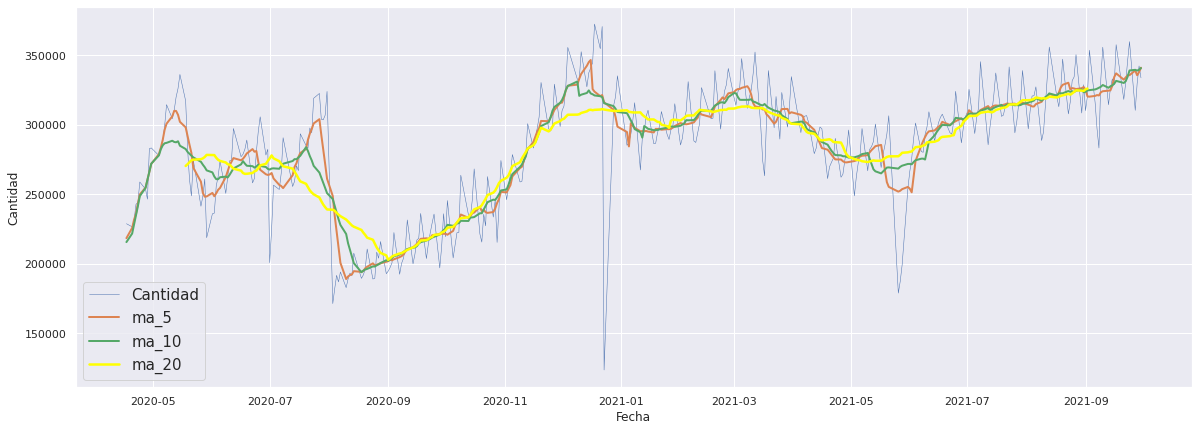

In [ ]:
plt.figure(figsize=(20, 7))
sns.set_context("paper")
sns.set_theme()
linewidth = 1.5
sns.lineplot(data=ds_habiles, y='Cantidad', x='Fecha',linewidth = 0.5)
# sns.lineplot(data=ds_habiles, y='Cantidad_ma5', x='Fecha', linewidth = 2)
sns.lineplot(data=ds_habiles, y='Cantidad_ma10', x='Fecha',linewidth = 2)
sns.lineplot(data=ds_habiles, y='Cantidad_ma20', x='Fecha', linewidth = 2)
sns.lineplot(data=ds_habiles, y=ds_habiles.rolling(on='Fecha', window=40, center=True)['Cantidad'].mean(), x='Fecha', linewidth = 2.5, color='yellow', legend='auto')
plt.legend(['Cantidad', 'ma_5', 'ma_10', 'ma_20', 'suave'], fontsize='15')

# plt.xlabel("Fecha", size=8)
# plt.xticks(rotation=45)
# plt.ylabel("Cantidad", size=10)
# plt.title('Cantidad de Vehiculos', size=20)
# plt.subplots_adjust(bottom=0.275)
plt.show()

In [ ]:
# Se nos presenta el desafio de modelizar con datos muy atípicos; desde que empieza la cuarentena, notandose el recupero gradual,
#  viendo importantes disrupciones por medidas gubernamentales de alcance muy puntual y acotado en el timepo.

In [ ]:
# Luego de experimentar con algunas visualizaciones, y por la naturaleza de las fluctuaciones, se propone modificar el dataset:
#  >> Se desestiman los datos anteriores a agosto 2020
#  >> Por lo atipico de las fiestas de 2020, se reemplazan los valores de cantidad por media movil centrada de 20 dias habiles (4 semanas)
#  >> Para las anomalías de junio 2021 (recrudecimiento de la cuarentena), los valores de mmc de 40 días hábiles (8 semanas)

In [ ]:
ds_final.drop(columns=['SENTIDO'], inplace=True) # Quito la columna ya que no la necesito más (este ds no es para graficar)
ds_final.sort_values(by=['Fecha', 'Hora'], inplace=True) # Ordenamos por Fechay y Hora
ds_final.head()

,HORA,Coordenadas,Egreso,Ingreso,Fecha,Hora,dia_semana,fecha_habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,viernes
74,2020-03-31 00:00:00,Retiro,0,1,2020-03-31,00,martes,0,159,0,0,0,1,0,0,0
75,2020-03-31 00:00:00,Retiro,1,0,2020-03-31,00,martes,0,164,0,0,0,1,0,0,0
76,2020-03-31 00:00:00,Palermo,1,0,2020-03-31,00,martes,0,7,0,0,0,1,0,0,0
77,2020-03-31 00:00:00,Flores,1,0,2020-03-31,00,martes,0,378,0,0,0,1,0,0,0
78,2020-03-31 00:00:00,Flores,0,1,2020-03-31,00,martes,0,358,0,0,0,1,0,0,0


In [ ]:
dummies = pd.get_dummies(ds_final['Coordenadas']) # Definimos los dummies para la localizacion de los sensores
ds_final = pd.concat([ds_final,dummies],axis = 1) # Generamos los dummies y los agregamos al ds

In [ ]:
ds_final = ds_final[ds_final.Fecha >= '2020-08-01'] # Eliminamos todo lo anterior a agosto 2020

In [ ]:
ds_final['4s'] = ds_final.rolling(on='Fecha', window=28, center=True)['Cantidad'].mean()
ds_final['8s'] = ds_final.rolling(on='Fecha', window=56, center=True)['Cantidad'].mean()
ds_final.dropna(subset=['8s'],inplace=True)

In [ ]:
date_aux_s4 = ds_final['Fecha'].loc[(ds_final['Fecha'] >= '2020-12-20') & (ds_final['Fecha'] < '2021-01-01')]
date_aux_s8 = ds_final['Fecha'].loc[(ds_final['Fecha'] >= '2021-05-23') & (ds_final['Fecha'] < '2021-06-07')]

In [ ]:
for i in range(len(ds_final)):
   if ds_final.iloc[i, 3] in date_aux_s4:
     ds_final.iloc[i, 7] = ds_final.iloc[i, 11]
     print(ds_final.iloc[i, 11])
   elif ds_final.iloc[i, 3] in date_aux_s8:
     ds_final.iloc[i, 7] = ds_final.iloc[i, 12] + 1000
     print(ds_final.iloc[i, 12])

In [ ]:
ds_new['Cantidad_final'] = ds_new['Fecha'].apply(lambda x: ds_4s if x in date_aux_s4 else ds_new['Cantidad'])

In [ ]:
ds_new['Cantidad'] = ds_new['Fecha'].apply(lambda x: ds_new['8s'] if x in date_aux_s8 else ds_new['Cantidad'])

In [ ]:
ds_final['Cantidad_2'] = ds_final['Fecha'].apply(lambda x: ds_final['Cantidad'] if x not in ds_final['Cantidad2'] else np.NaN)

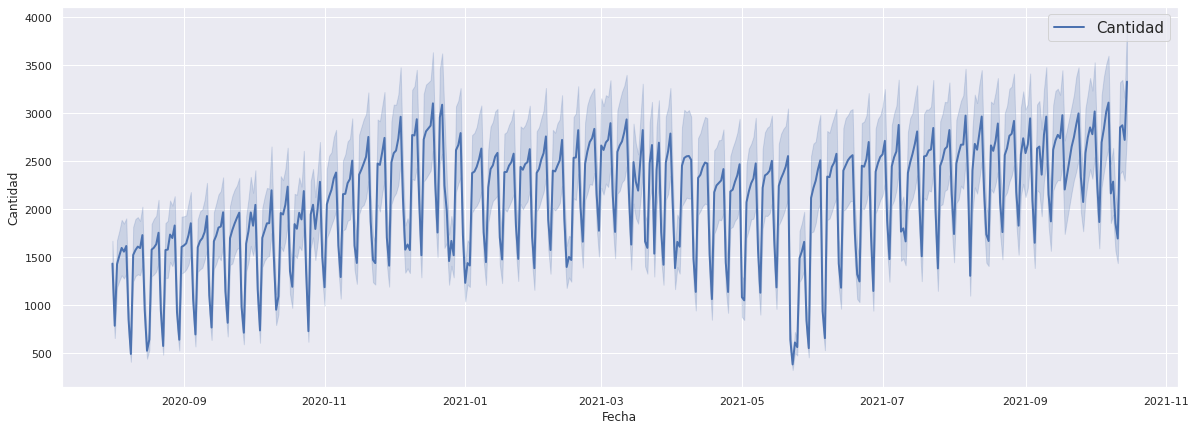

In [ ]:
plt.figure(figsize=(20, 7))
sns.set_context("paper")
sns.set_theme()
linewidth = 1.5
sns.lineplot(data=ds_final, y='Cantidad', x='Fecha',linewidth = 2)
plt.legend(['Cantidad'], fontsize='15')

plt.show()

In [ ]:
ds_final.head()

,HORA,Coordenadas,Egreso,Ingreso,Fecha,Hora,dia_semana,fecha_habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,viernes,Flores,Palermo,Retiro
20857,2020-08-01 00:00:00,Palermo,1,0,2020-08-01,00,sabado,0,28,0,0,0,0,0,1,0,0,1,0
20640,2020-08-01 00:00:00,Flores,0,1,2020-08-01,00,sabado,0,655,0,0,0,0,0,1,0,1,0,0
20639,2020-08-01 00:00:00,Flores,1,0,2020-08-01,00,sabado,0,706,0,0,0,0,0,1,0,1,0,0
21037,2020-08-01 00:00:00,Retiro,0,1,2020-08-01,00,sabado,0,352,0,0,0,0,0,1,0,0,0,1
21036,2020-08-01 00:00:00,Retiro,1,0,2020-08-01,00,sabado,0,358,0,0,0,0,0,1,0,0,0,1


In [ ]:
ds_final.dtypes

HORA                   object
Coordenadas            object
Egreso                  uint8
Ingreso                 uint8
Fecha          datetime64[ns]
Hora                   object
dia_semana             object
fecha_habil             int64
Cantidad                int64
domingo                 uint8
jueves                  uint8
lunes                   uint8
martes                  uint8
miercoles               uint8
sabado                  uint8
viernes                 uint8
Flores                  uint8
Palermo                 uint8
Retiro                  uint8
dtype: object

In [ ]:
ds_final.drop(columns={'Coordenadas','Fecha', 'Hora'}, inplace=True)

In [ ]:
ds_final.reset_index(drop=True, inplace=True)

In [ ]:
ds_final.drop(columns='dia_semana', inplace=True)

In [ ]:
ds_final.head(10)

,HORA,Egreso,Ingreso,fecha_habil,Cantidad,domingo,jueves,lunes,martes,miercoles,sabado,viernes,Flores,Palermo,Retiro
0,2020-08-01 00:00:00,1,0,0,28,0,0,0,0,0,1,0,0,1,0
1,2020-08-01 00:00:00,0,1,0,655,0,0,0,0,0,1,0,1,0,0
2,2020-08-01 00:00:00,1,0,0,706,0,0,0,0,0,1,0,1,0,0
3,2020-08-01 00:00:00,0,1,0,352,0,0,0,0,0,1,0,0,0,1
4,2020-08-01 00:00:00,1,0,0,358,0,0,0,0,0,1,0,0,0,1
5,2020-08-01 01:00:00,1,0,0,29,0,0,0,0,0,1,0,0,1,0
6,2020-08-01 01:00:00,1,0,0,439,0,0,0,0,0,1,0,1,0,0
7,2020-08-01 01:00:00,0,1,0,422,0,0,0,0,0,1,0,1,0,0
8,2020-08-01 01:00:00,0,1,0,287,0,0,0,0,0,1,0,0,0,1
9,2020-08-01 01:00:00,1,0,0,290,0,0,0,0,0,1,0,0,0,1


In [ ]:
path = 'ds_final.xlsx'
ds_final.to_excel(path, index=True)